In [61]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [80]:
df = pd.read_csv("train.csv")
df.sample(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
23847,Dealer,0,1,2,BHK,985.915493,1,1,"Dera Bassi,Chandigarh",30.594843,76.849830,23.8
26497,Dealer,0,0,2,BHK,990.099010,1,1,"Karanjade,Lalitpur",24.690280,78.418890,58.0
22967,Dealer,1,1,4,BHK,2090.410243,0,1,"Zirakpur,Chandigarh",30.662283,76.822397,80.0
7055,Dealer,0,1,2,BHK,948.031496,1,1,"Raj Nagar Extension,Ghaziabad",26.900926,75.775927,30.1
23513,Dealer,0,1,2,BHK,1294.964029,1,1,"Sector-107 Noida,Noida",28.546788,77.378494,73.8


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [12]:
df.shape

(29451, 12)

In [8]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [82]:
df.corr(numeric_only=True)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000


In [11]:
for col in df.columns:
    print(df[col].value_counts())

POSTED_BY
Dealer     18291
Owner      10538
Builder      622
Name: count, dtype: int64
UNDER_CONSTRUCTION
0    24157
1     5294
Name: count, dtype: int64
RERA
0    20088
1     9363
Name: count, dtype: int64
BHK_NO.
2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
20        4
10        4
15        4
12        3
9         3
13        1
17        1
11        1
Name: count, dtype: int64
BHK_OR_RK
BHK    29427
RK        24
Name: count, dtype: int64
SQUARE_FT
1000.000000    479
1250.000000    294
800.000000     202
1200.000000    179
1600.000000    125
              ... 
1685.097420      1
1085.176085      1
1300.142248      1
911.002102       1
896.774194       1
Name: count, Length: 19561, dtype: int64
READY_TO_MOVE
1    24157
0     5294
Name: count, dtype: int64
RESALE
1    27377
0     2074
Name: count, dtype: int64
ADDRESS
Zirakpur,Chandigarh                   509
Whitefield,Bangalore                  230
Raj Nagar Extension,Ghaziabad       

In [83]:
df["BHK_NO."].value_counts()

BHK_NO.
2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
20        4
10        4
15        4
12        3
9         3
13        1
17        1
11        1
Name: count, dtype: int64

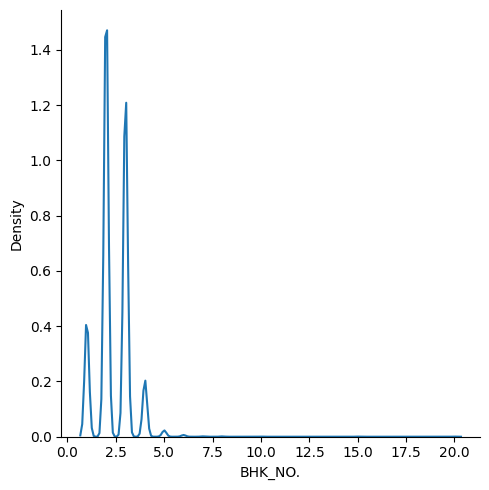

In [15]:
sns.displot(df["BHK_NO."],kind="kde")

In [19]:
percentile25=df["BHK_NO."].quantile(0.25)
percentile75=df["BHK_NO."].quantile(0.75)

iqr=percentile75-percentile25

upper_limit=percentile75 +1.5*iqr
lower_limit=percentile25 -1.5*iqr

print(upper_limit,lower_limit)

df=df[df["BHK_NO."]<upper_limit]

4.5 0.5


In [20]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [ ]:
df["BHK_OR_RK"].value_counts()



BHK_OR_RK
BHK    29143
RK        24
Name: count, dtype: int64

In [84]:
# as the 99.99% value are bhk so we are just droping this column
df.drop(columns=["BHK_OR_RK"],inplace=True)

In [23]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [85]:
df["SQUARE_FT"]=df["SQUARE_FT"].round(2)
df["LONGITUDE"]=df["LONGITUDE"].round(2)
df["LATITUDE"]=df["LATITUDE"].round(2)
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,1300.24,1,1,"Ksfc Layout,Bangalore",12.97,77.60,55.0
1,Dealer,0,0,2,1275.00,1,1,"Vishweshwara Nagar,Mysore",12.27,76.64,51.0
2,Owner,0,0,2,933.16,1,1,"Jigani,Bangalore",12.78,77.63,43.0
3,Owner,0,1,2,929.92,1,1,"Sector-1 Vaishali,Ghaziabad",28.64,77.34,62.5
4,Dealer,1,0,2,999.01,0,1,"New Town,Kolkata",22.59,88.48,60.5
...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,2500.00,1,1,"Shamshabad Road,Agra",27.14,78.04,45.0
29447,Owner,0,0,2,769.23,1,1,"E3-108, Lake View Recidency,,Vapi",39.95,-86.15,16.0
29448,Dealer,0,0,2,1022.64,1,1,"Ajmer Road,Jaipur",26.93,75.83,27.1
29449,Owner,0,0,2,927.08,1,1,"Sholinganallur,Chennai",12.90,80.23,67.0


In [86]:
df.drop(columns=["ADDRESS"],inplace=True)
# all re different value 
df.sample(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
9050,Dealer,0,0,2,958.13,1,1,22.54,88.34,46.0
25903,Owner,0,1,3,1076.23,1,1,26.90,75.78,36.0
25442,Owner,0,0,1,675.00,1,1,18.58,73.98,34.0
18812,Dealer,0,1,2,587.08,1,1,28.43,77.35,27.0
1456,Dealer,0,1,1,654.74,1,1,19.06,72.90,120.0
3879,Dealer,0,0,2,1000.00,1,1,12.90,80.16,43.9
21070,Owner,0,0,2,1350.31,1,1,30.66,76.86,35.0
14032,Dealer,1,1,3,936.33,0,0,19.25,72.96,150.0
2066,Owner,0,0,2,1217.10,1,1,15.46,73.80,80.0
3670,Owner,0,0,3,11310.34,1,1,26.99,75.58,16.4


<Axes: ylabel='SQUARE_FT'>

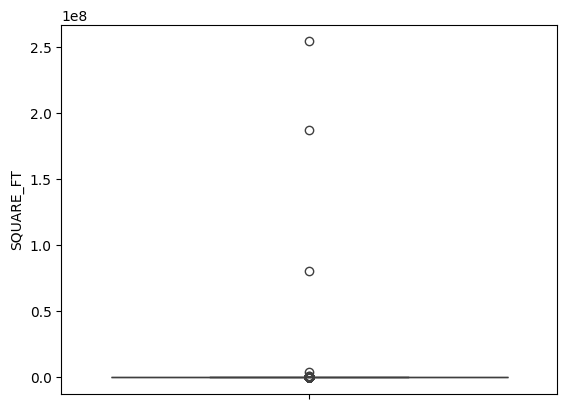

In [37]:
sns.boxplot(df["SQUARE_FT"])

In [44]:
upper_limit = df['SQUARE_FT'].quantile(0.99)
df = df[df['SQUARE_FT'] <= upper_limit]

In [45]:
df.shape

(28875, 10)

<Axes: ylabel='LONGITUDE'>

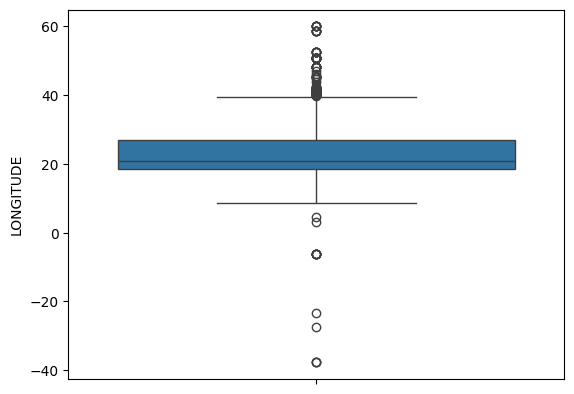

In [46]:
sns.boxplot(df["LONGITUDE"])

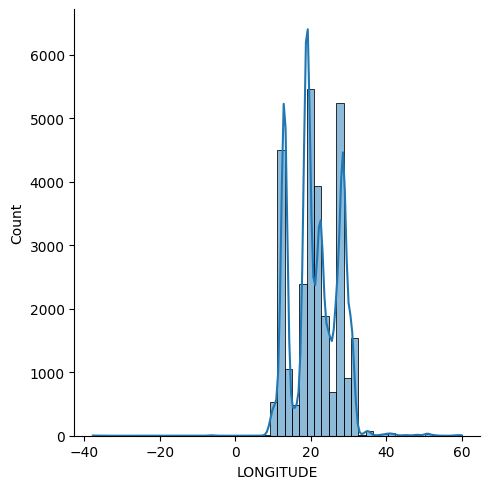

In [51]:
sns.displot(df["LONGITUDE"],kde=True,bins=50)

In [54]:
percentile25=df["LONGITUDE"].quantile(0.25)
percentile75=df["LONGITUDE"].quantile(0.75)

iqr=percentile75-percentile25

upper_limit=percentile75 +1.5*iqr
lower_limit=percentile25 -1.5*iqr

print(upper_limit,lower_limit)
df=df[(df["LONGITUDE"]<upper_limit) & (df["LONGITUDE"]>lower_limit)]

39.574999999999996 5.775


In [55]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,1300.24,1,1,12.97,77.60,55.0
1,Dealer,0,0,2,1275.00,1,1,12.27,76.64,51.0
2,Owner,0,0,2,933.16,1,1,12.78,77.63,43.0
3,Owner,0,1,2,929.92,1,1,28.64,77.34,62.5
4,Dealer,1,0,2,999.01,0,1,22.59,88.48,60.5
...,...,...,...,...,...,...,...,...,...,...
29445,Owner,0,0,2,1062.13,1,1,15.87,74.50,40.0
29446,Owner,0,0,3,2500.00,1,1,27.14,78.04,45.0
29448,Dealer,0,0,2,1022.64,1,1,26.93,75.83,27.1
29449,Owner,0,0,2,927.08,1,1,12.90,80.23,67.0


In [57]:
percentile25=df["LATITUDE"].quantile(0.25)
percentile75=df["LATITUDE"].quantile(0.75)

iqr=percentile75-percentile25

upper_limit=percentile75 +1.5*iqr
lower_limit=percentile25 -1.5*iqr

print(upper_limit,lower_limit)
df=df[(df["LATITUDE"]<upper_limit) & (df["LATITUDE"]>lower_limit)]

83.44000000000003 67.91999999999999


In [59]:
df.shape

(25911, 10)

In [60]:
df["POSTED_BY"].value_counts()

POSTED_BY
Dealer     16165
Owner       9210
Builder      536
Name: count, dtype: int64

In [90]:
x=df.drop(columns=["TARGET(PRICE_IN_LACS)"])
y=df["TARGET(PRICE_IN_LACS)"]

In [87]:
numerical_cols=df.select_dtypes(include=['int64','float64'])

In [88]:
q1 = numerical_cols.quantile(0.25)
q3 = numerical_cols.quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

cols_fix = ['LATITUDE', 'LONGITUDE', 'BHK_NO.']

for col in cols_fix:
    lb = lower_bound[col]
    ub = upper_bound[col]
    df[col] = df[col].clip(lower=lb, upper=ub)


In [89]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2.0,1300.24,1,1,12.970,77.6000,55.0
1,Dealer,0,0,2.0,1275.00,1,1,12.270,76.6400,51.0
2,Owner,0,0,2.0,933.16,1,1,12.780,77.6300,43.0
3,Owner,0,1,2.0,929.92,1,1,28.640,77.3400,62.5
4,Dealer,1,0,2.0,999.01,0,1,22.590,83.8625,60.5
...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3.0,2500.00,1,1,27.140,78.0400,45.0
29447,Owner,0,0,2.0,769.23,1,1,39.575,67.7625,16.0
29448,Dealer,0,0,2.0,1022.64,1,1,26.930,75.8300,27.1
29449,Owner,0,0,2.0,927.08,1,1,12.900,80.2300,67.0


<Axes: >

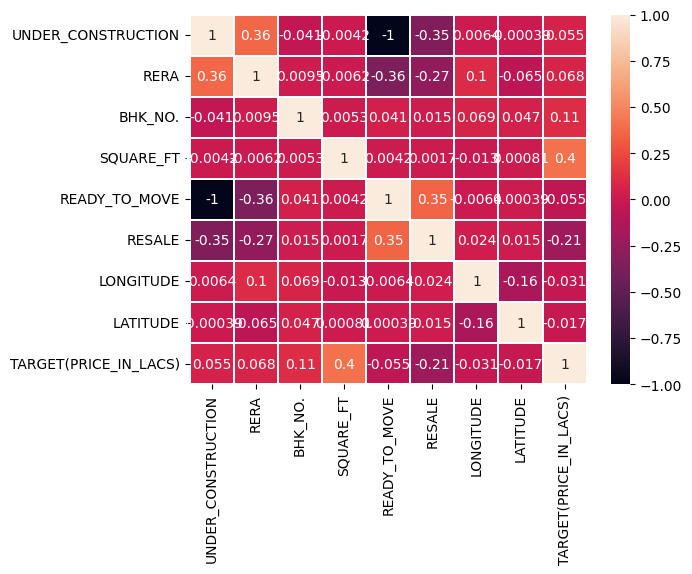

In [92]:
sns.heatmap((numerical_cols.corr()),annot=True,linewidths=0.3)


In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [94]:
trf1=ColumnTransformer([
    ("OneHotEncoder",OneHotEncoder(sparse_output=False,drop="first"),[0])
],remainder="passthrough")

In [95]:
trf2=ColumnTransformer([
    ("MinMaxScaler",MinMaxScaler(),slice(0,9))
])

In [113]:
# trf3=LinearRegression()
# trf3 = Ridge(alpha=1)
from sklearn.ensemble import RandomForestRegressor

trf3 = RandomForestRegressor()



In [114]:
model=make_pipeline(trf1,trf2,trf3)

In [115]:
model.fit(x_train,y_train)

,steps,"[('columntransformer-1', ...), ('columntransformer-2', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('OneHotEncoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [116]:
y_pred=model.predict(x_test)

In [117]:
r2_score(y_pred,y_test)

0.9283218491058778

In [118]:
mean_absolute_error(y_pred,y_test)

36.34831690730005

In [119]:
np.sqrt(mean_squared_error(y_pred,y_test))

np.float64(164.64078154984847)

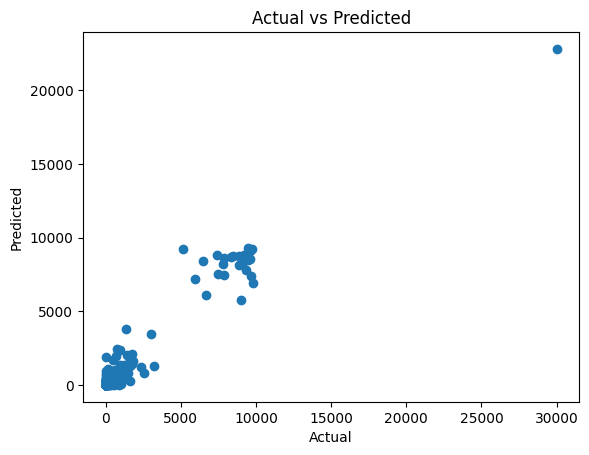

In [120]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


<Axes: xlabel='LATITUDE', ylabel='TARGET(PRICE_IN_LACS)'>

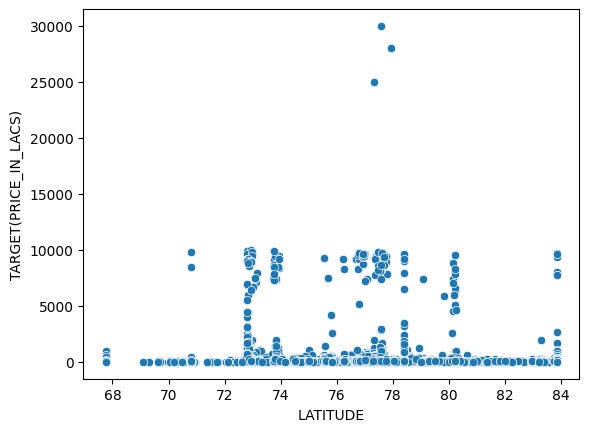

In [122]:
sns.scatterplot(x='LATITUDE', y='TARGET(PRICE_IN_LACS)', data=df)

